In [42]:
!pip install descartes
!pip install geopandas
!pip install mxnet

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 28.4MB 1.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.8MB 6.0MB/s eta 0:00:01
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


See [here](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1) for notes on using **matplotlib** in Jupyter notebooks.

In [43]:
import os
import boto3
import pandas as pd
import geopandas
import mxnet as mx
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
plt.rcParams['figure.figsize'] = [19, 12]

In [33]:
bucket_name = 'modeling-lab'
sightings = pd.read_csv('s3://' + bucket_name + '/ufo_fullset.csv')

Notes on `GeoDataFrame` [here](https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html).

In [5]:
sightings_geo = geopandas.GeoDataFrame(
    sightings, geometry=geopandas.points_from_xy(sightings.longitude, sightings.latitude))

In [6]:
sightings_geo.head()

,reportedTimestamp,eventDate,eventTime,shape,duration,witnesses,weather,firstName,lastName,latitude,longitude,sighting,physicalEvidence,contact,researchOutcome,geometry
0,1977-04-04T04:02:23.340Z,1977-03-31,23:46,circle,4,1,rain,Ila,Bashirian,47.329444,-122.578889,Y,N,N,explained,POINT (-122.5788889 47.32944439999999)
1,1982-11-22T02:06:32.019Z,1982-11-15,22:04,disk,4,1,partly cloudy,Eriberto,Runolfsson,52.664913,-1.034894,Y,Y,N,explained,POINT (-1.034894 52.664913)
2,1992-12-07T19:06:52.482Z,1992-12-07,19:01,circle,49,1,clear,Miller,Watsica,38.951667,-92.333889,Y,N,N,explained,POINT (-92.33388890000001 38.9516667)
3,2011-02-24T21:06:34.898Z,2011-02-21,20:56,disk,13,1,partly cloudy,Clifton,Bechtelar,41.496944,-71.367778,Y,N,N,explained,POINT (-71.3677778 41.4969444)
4,1991-03-09T16:18:45.501Z,1991-03-09,11:42,circle,17,1,mostly cloudy,Jayda,Ebert,47.606389,-122.330833,Y,N,N,explained,POINT (-122.3308333 47.6063889)


In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

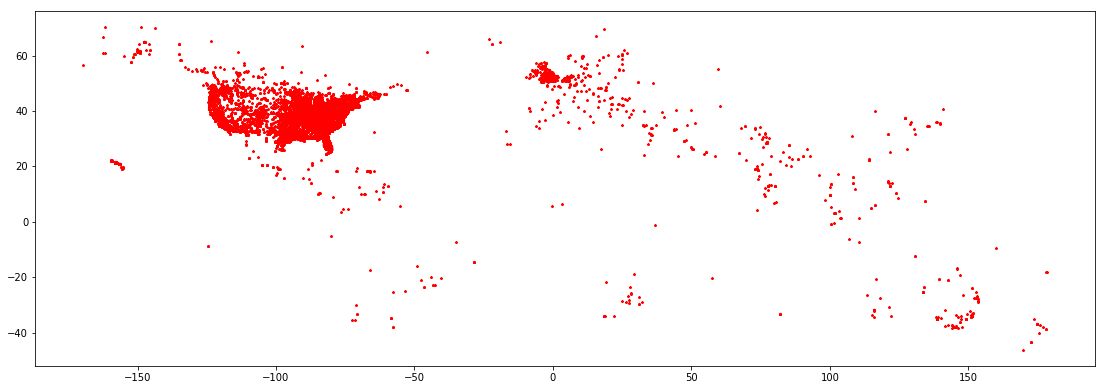

In [8]:
sightings_geo.plot(marker='*', color='red', markersize=5)

Notes on maps with layers [here](http://geopandas.org/mapping.html).

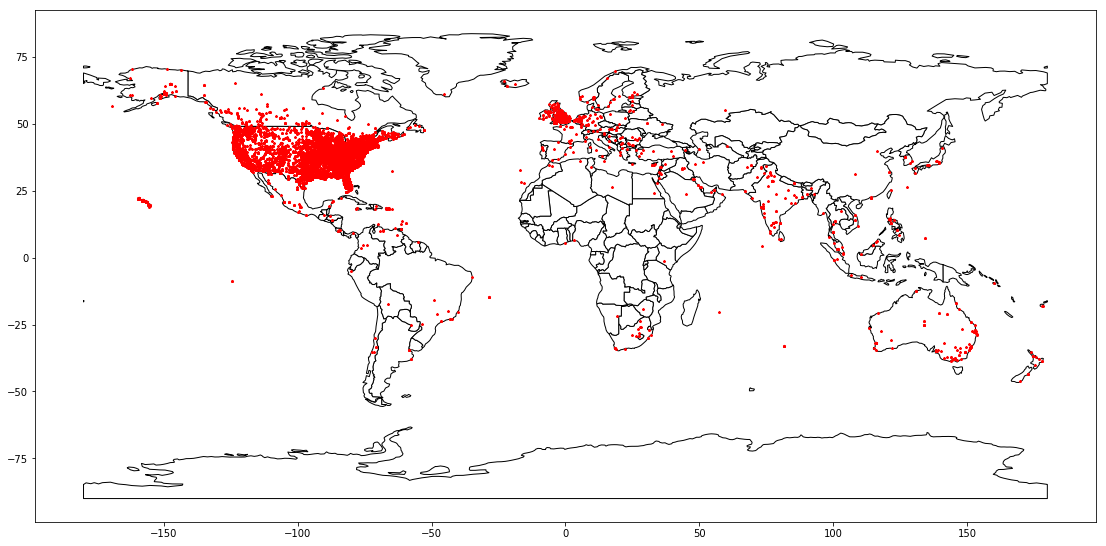

In [62]:
ax = world.plot(color='white', edgecolor='black')
sightings_geo.plot(ax=ax, marker='*', color='red', markersize=5)

## Let's make some sages!

In [16]:
sightings.dtypes

reportedTimestamp     object
eventDate             object
eventTime             object
shape                 object
duration               int64
witnesses              int64
weather               object
firstName             object
lastName              object
latitude             float64
longitude            float64
sighting              object
physicalEvidence      object
contact               object
researchOutcome       object
geometry              object
dtype: object

In [12]:
from sagemaker import KMeans, get_execution_role

In [14]:
role = get_execution_role()
role

'arn:aws:iam::498000146110:role/service-role/AmazonSageMaker-ExecutionRole-20190717T234103'

In [15]:
kmeans = KMeans(role=role,
                train_instance_count=1,
                train_instance_type='ml.c4.xlarge',
                output_path='s3://' + bucket_name + '/clusters/',
                k=10)

In [51]:
train_df = sightings[['latitude', 'longitude']]
train_df

,latitude,longitude
0,47.329444,-122.578889
1,52.664913,-1.034894
2,38.951667,-92.333889
3,41.496944,-71.367778
4,47.606389,-122.330833
5,33.916389,-118.351667
6,33.669444,-117.822222
7,44.716667,-75.516667
8,40.866667,-124.081667
9,47.130278,-119.276944


In [53]:
train_data = train_df.values.astype('float32')
train_data

array([[  47.329445, -122.57889 ],
       [  52.664913,   -1.034894],
       [  38.951668,  -92.333885],
       ...,
       [  36.86639 ,  -83.888885],
       [  35.385834,  -94.39833 ],
       [  29.883055,  -97.94111 ]], dtype=float32)

In [27]:
%%time
kmeans.fit(kmeans.record_set(train_data))

2019-07-18 04:51:49 Starting - Starting the training job...
2019-07-18 04:51:51 Starting - Launching requested ML instances......
2019-07-18 04:52:53 Starting - Preparing the instances for training......
2019-07-18 04:54:13 Downloading - Downloading input data...
2019-07-18 04:54:50 Training - Training image download completed. Training in progress..
Docker entrypoint called with argument(s): train
[07/18/2019 04:54:53 INFO 139712072935232] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', u'eval_metrics': u'["msd"]


2019-07-18 04:55:02 Uploading - Uploading generated training model
2019-07-18 04:55:02 Completed - Training job completed
Billable seconds: 49
CPU times: user 681 ms, sys: 47.2 ms, total: 728 ms
Wall time: 3min 42s


## Access the model attributes

In [28]:
job_name = 'kmeans-2019-07-18-04-51-49-687'
model_key = 'clusters/' + job_name + '/output/model.tar.gz'

In [35]:
boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')

In [38]:
os.system('tar -zxvf model.tar.gz')

0

In [39]:
os.system('unzip model_algo-1')

2304

In [44]:
Kmeans_model_params = mx.ndarray.load('model_algo-1')

In [45]:
Kmeans_model_params

[
 [[  31.267433   -82.16549  ]
  [  17.35397    101.441826 ]
  [  44.264038  -123.75005  ]
  [  51.558       -4.8502274]
  [  35.276363   -99.111305 ]
  [  35.087124  -116.22023  ]
  [  24.46517     43.342697 ]
  [ -31.892548   146.39465  ]
  [  40.935986   -87.7115   ]
  [  41.40305    -75.03077  ]]
 <NDArray 10x2 @cpu(0)>]

In [49]:
cluster_centroids = pd.DataFrame(Kmeans_model_params[0].asnumpy())

In [55]:
cluster_centroids.columns = train_df.columns

In [56]:
cluster_centroids

,latitude,longitude
0,31.267433,-82.165489
1,17.353970,101.441826
2,44.264038,-123.750053
3,51.557999,-4.850227
4,35.276363,-99.111305
5,35.087124,-116.220230
6,24.465170,43.342697
7,-31.892548,146.394653
8,40.935986,-87.711502
9,41.403049,-75.030769


In [57]:
centroids_geo = geopandas.GeoDataFrame(
    cluster_centroids, geometry=geopandas.points_from_xy(cluster_centroids.longitude, cluster_centroids.latitude))

In [58]:
centroids_geo

,latitude,longitude,geometry
0,31.267433,-82.165489,POINT (-82.16548919677734 31.26743316650391)
1,17.353970,101.441826,POINT (101.4418258666992 17.35396957397461)
2,44.264038,-123.750053,POINT (-123.7500534057617 44.2640380859375)
3,51.557999,-4.850227,POINT (-4.850227355957031 51.55799865722656)
4,35.276363,-99.111305,POINT (-99.11130523681641 35.27636337280273)
5,35.087124,-116.220230,POINT (-116.2202301025391 35.08712387084961)
6,24.465170,43.342697,POINT (43.34269714355469 24.46516990661621)
7,-31.892548,146.394653,POINT (146.3946533203125 -31.89254760742188)
8,40.935986,-87.711502,POINT (-87.71150207519531 40.93598556518555)
9,41.403049,-75.030769,POINT (-75.03076934814453 41.40304946899414)


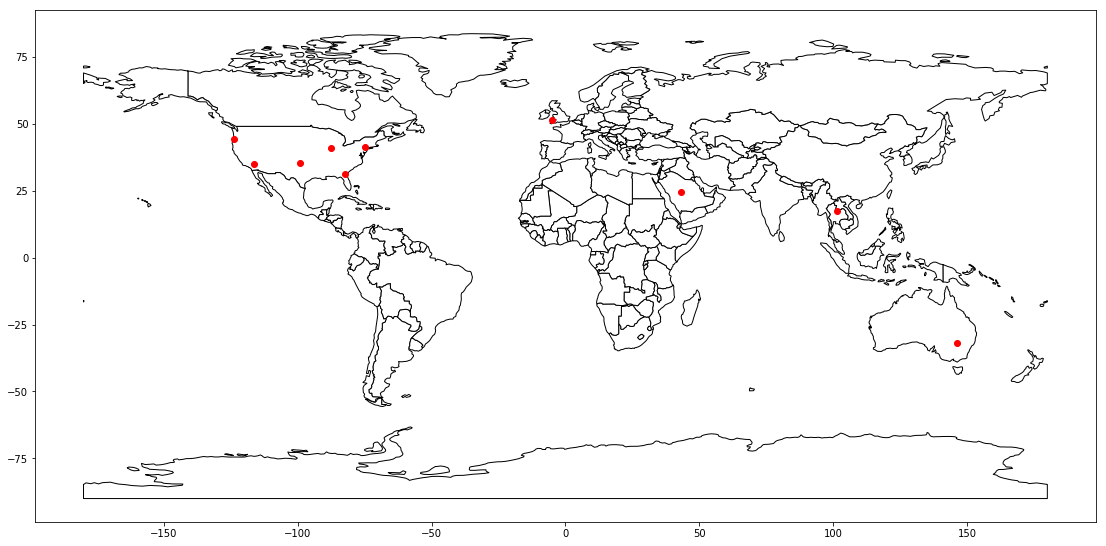

In [66]:
ax = world.plot(color='white', edgecolor='black')
centroids_geo.plot(ax=ax, color='red')